# Batch screening

This notebook is designed to streamling the inspection and analysis of ImFCS output. It:

- Scans through all valid base file combinations from:

  - the corresponding `.xlsx` metadata and result file `.xlsx`
  - the matching `_AVR.tif` image stacks

- From these inputs, it reconstructs:

  - an **intensity map** for reference
  - **parameter maps** (e.g. diffusion parameters, amplitudes, etc. depending on your pipeline)
  - **ACFs and corresponding fits** for the selected regions

- Uses **ipywidgets** to provide an interactive UI that lets you:

  - pre-select one or multiple regions of interest (ROIs)
  - store these ROIs and associated analysis results into a database (currently handled via `pickle`)

- Allows you to **reload previously stored selections** from a pickle file in order to:
  - visualise the previously selected regions and their analysis results
  - optionally **rework / refine** the ROI selection and save the updated selection back to disk


In [1]:
from importlib.metadata import version, metadata

In [2]:
lib_name = "imfcsoutputhandlerlib"
print(f"Running {metadata(lib_name)['Name']} v{version(lib_name)}")

Running imfcsoutputhandlerlib v0.0.1


In [3]:
from pathlib import Path
import os
import time
import datetime

from imfcsoutputhandlerlib.all_image import AllImage
from imfcsoutputhandlerlib.imfcs_selector_app import ImfcsScreenerApp

### Set the input directory


In [4]:
DIRNAME = "input/input_mef-dii-oa-batch"


current_dir = Path().resolve()
input_path = Path(os.path.join(current_dir.parent, DIRNAME))

### Choose whether to reload previous database (if so provide .pkl filename) or load from scratch


In [5]:
# User defined parameters
IS_LOAD_FROM_PICKLE = True
PICKLE_DATABSE_FILENAME = "all-image-database_20251201_170033.pkl"

In [6]:
if IS_LOAD_FROM_PICKLE:
    print("loading database from pickle...")
    time_start = time.time()
    # Loading from pickle file
    all_image_instance = AllImage.from_pickle(
        Path(os.path.join(input_path, PICKLE_DATABSE_FILENAME))
    )
    time_elapsed = time.time() - time_start
    print(f"time taken to load database: {time_elapsed:.3f} s")
else:
    PICKLE_DATABSE_FILENAME = (
        f"all-image-database_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.pkl"
    )
    all_image_instance: AllImage = None

loading database from pickle...
Missing 'new_method'. Added default implementation.
time taken to load database: 1.037 s


Total files loaded from database: 136


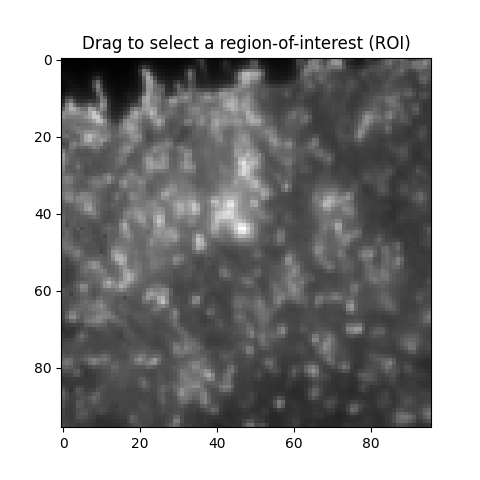

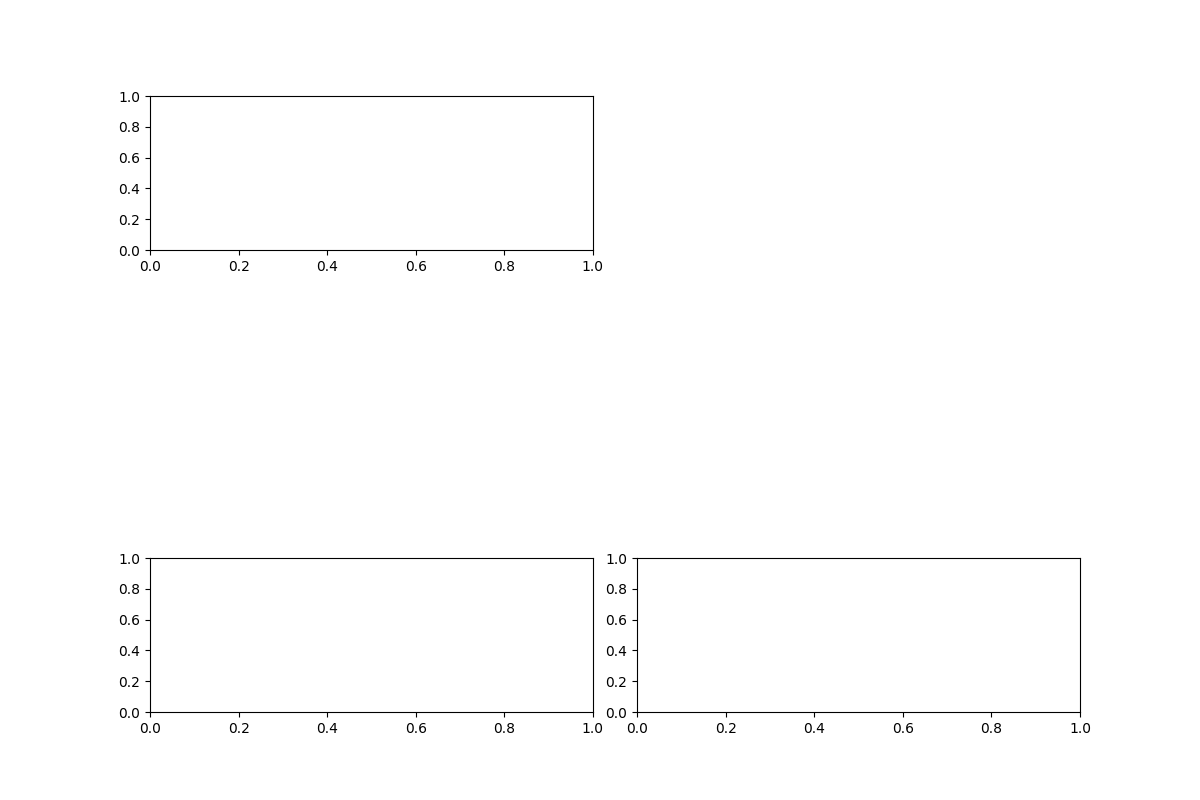

In [ ]:
%matplotlib widget
# Create and run the app
app = ImfcsScreenerApp(input_path=input_path, loaded_database=all_image_instance)
app.run()

### Choose whether to save/resave databse


In [8]:
IS_SAVE_DB = False

if IS_SAVE_DB:
    if IS_LOAD_FROM_PICKLE:
        print(
            f"overwriting {PICKLE_DATABSE_FILENAME} saving database array as pickle..."
        )
    else:
        print(f"saving database array as pickle... {PICKLE_DATABSE_FILENAME}")

    # get database
    all_image_instance = app.get_AllImage()

    # Saving to pickle
    all_image_instance.save(
        filename=Path(os.path.join(input_path, PICKLE_DATABSE_FILENAME))
    )